<a href="https://colab.research.google.com/github/RobertoFernandez1/EIE_401_MULTIMEDIA/blob/main/Actividad_5_FernandezRoberto_RobertoFernandez1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Roberto Ignacio Fernandez Fuentes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [209]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git #llamamos desde git hub el reposito que ocuparemos para trabajar

fatal: destination path 'EIE_401_MULTIMEDIA' already exists and is not an empty directory.


In [228]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display

Sound = "/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav" #Nombre del archivo de audio que ocuparemos
waveform, sample_rate = librosa.load(Sound, sr=None)

# Reproducir el audio
Audio(data=waveform, rate=sample_rate)







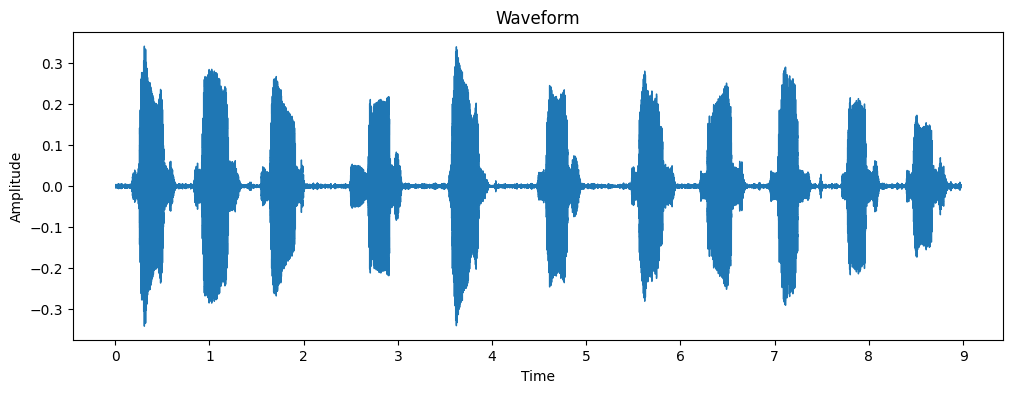

In [229]:
# Visualizar la forma de onda
plt.figure(figsize=(12, 4))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

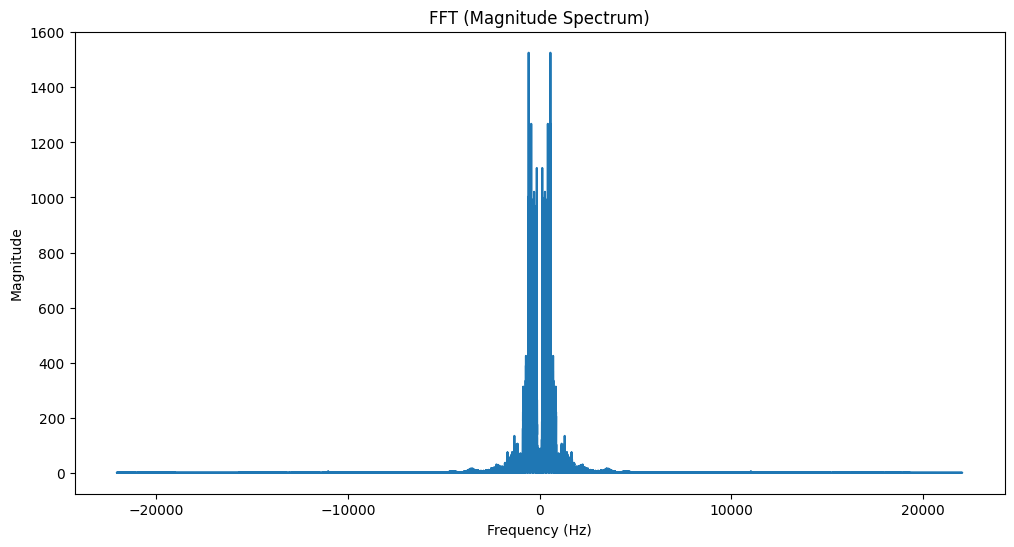

In [ ]:

#Codigo para calcular la transformada de fourier
fft_result = np.fft.fft(waveform)


magnitude = np.abs(fft_result)


frequencies = np.fft.fftfreq(len(magnitude), 1/sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.title('FFT (Magnitude Spectrum)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

## 2. Obtén el espectrograma de tu señal de audio

197893 22050


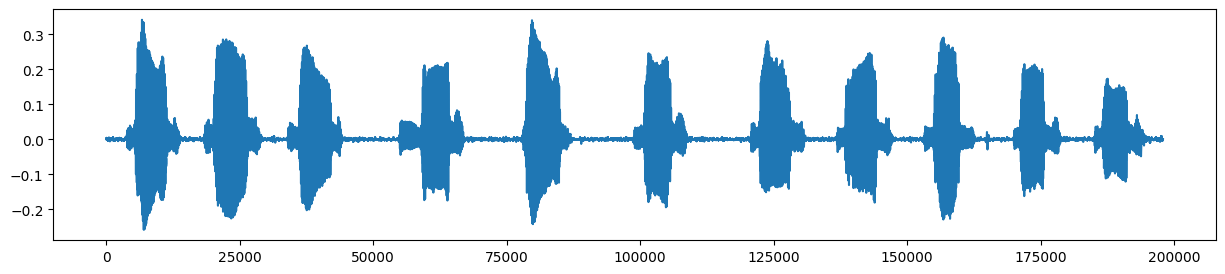

In [218]:
import librosa
x , sr =librosa.load("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")
print(len(x),(sr))
plt.figure(figsize=(15,3))
plt.plot(x)

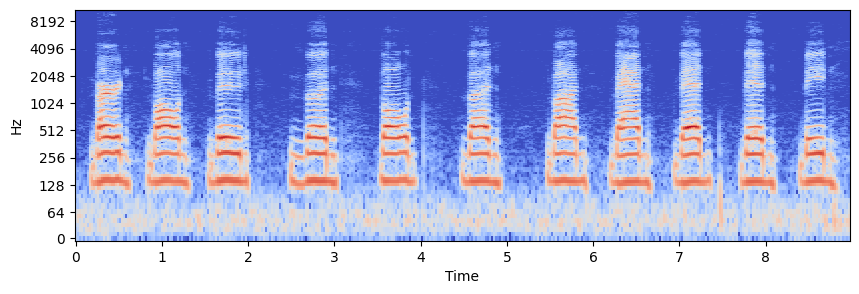

In [219]:
import librosa
x=librosa.stft(x)
xdb = librosa.amplitude_to_db(abs(x))
plt.figure(figsize=(10,3))

librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="log") #libreria que ocupamos para plotear el espectograma




## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.



In [231]:
import librosa
from IPython.display import Audio
from typing import List, Tuple
import numpy as np

def my_slicing(Sound: np.ndarray, longitud_slice: int, overlap: int) -> Tuple[List[np.ndarray], List[int]]:#definimos nuestra funcion
    numero_segmentos = int(np.floor((len(Sound) - overlap) / (longitud_slice - overlap))) #numero de segmentos para el slicing de Sound
    segmentos = [] #Arreglo
    longitudes_segmento = []

    for i in range(numero_segmentos):
        inicio = i * (longitud_slice - overlap) #Metodo iteriativo
        fin = inicio + longitud_slice
        segmento = Sound[inicio:fin]
        segmentos.append(segmento)
        longitudes_segmento.append(len(segmento))#Agrego los segmentos

    ultimo_inicio = inicio + longitud_slice - overlap
    ultimo_fin = len(Sound)
    ultimo_segmento = Sound[ultimo_inicio:ultimo_fin]
    segmentos.append(ultimo_segmento)
    longitudes_segmento.append(len(ultimo_segmento))

    return segmentos, longitudes_segmento

datos, _ = librosa.load(Sound, sr=None)


longitud_slice = 5 * 22050 #Deinimos los parametros de longitud_slice y overlap
overlap = 0

segmentos, longitudes = my_slicing(datos, longitud_slice, overlap)

# Reproducir cada segmento
for i in range(len(segmentos)):
    print(f"Reproduciendo segmento {i+1}")
    display(Audio(segmentos[i], rate=44100, autoplay=True)) #Corremos los slice de Sound







Reproduciendo segmento 1


Reproduciendo segmento 2


Reproduciendo segmento 3


Reproduciendo segmento 4


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

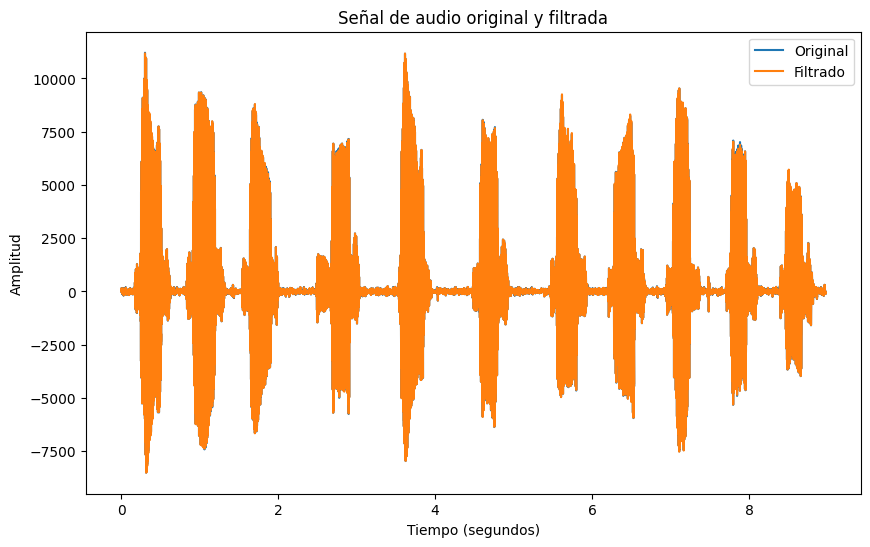

In [233]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter,lfilter
from scipy.signal import freqz

sample_rate, Sound = wavfile.read('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')


fc = 4000  # Frecuencia de corte en Hz
order = 4  # Orden del filtro

# Calcular los coeficientes del filtro de Butterworth
b, a = signal.butter(order, fc / (sample_rate / 2), 'low')


filtered_audio = signal.lfilter(b, a, Sound) # Aplicar el filtro a la señal de audio


plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Sound)) / sample_rate, Sound, label='Original')
plt.plot(np.arange(len(filtered_audio)) / sample_rate, filtered_audio, label='Filtrado')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.title('Señal de audio original y filtrada')
plt.legend()
plt.show()


## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
